In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import statsmodels.formula.api as smf
import datetime

# Data

### We call the data of the economic indicators between US and UK.
We will use the yield of the 2 years notes as the interest rate indicator for both countries. We also use the CPI as the inflation index, and the Industrial index as an indicator of the GDP. The final output of this project is the exchange rate fluctuation.

In [3]:
df = pd.read_csv('final_project_data.csv', parse_dates = True, index_col = 0) # read in the data
df.tail(15) # show the last 15 rows of the data

,USD2YB,UK2YB,UK YoY CPI,US YoY CPI,US Industrial Index,UK industrial Index
Date,,,,,,
2023-12-12,4.732,4.506,NaN,3.1,NaN,NaN
2023-12-13,4.429,4.365,NaN,NaN,NaN,NaN
2023-12-14,4.389,4.327,NaN,NaN,NaN,NaN
2023-12-15,4.446,4.267,NaN,NaN,NaN,NaN
2023-12-18,4.447,4.296,NaN,NaN,102.4301,93.9
2023-12-19,4.441,4.265,NaN,NaN,NaN,NaN
2023-12-20,4.333,4.089,3.9,NaN,NaN,NaN
2023-12-21,4.348,4.044,NaN,NaN,NaN,NaN
2023-12-22,4.324,4.030,NaN,NaN,NaN,NaN


<Axes: >

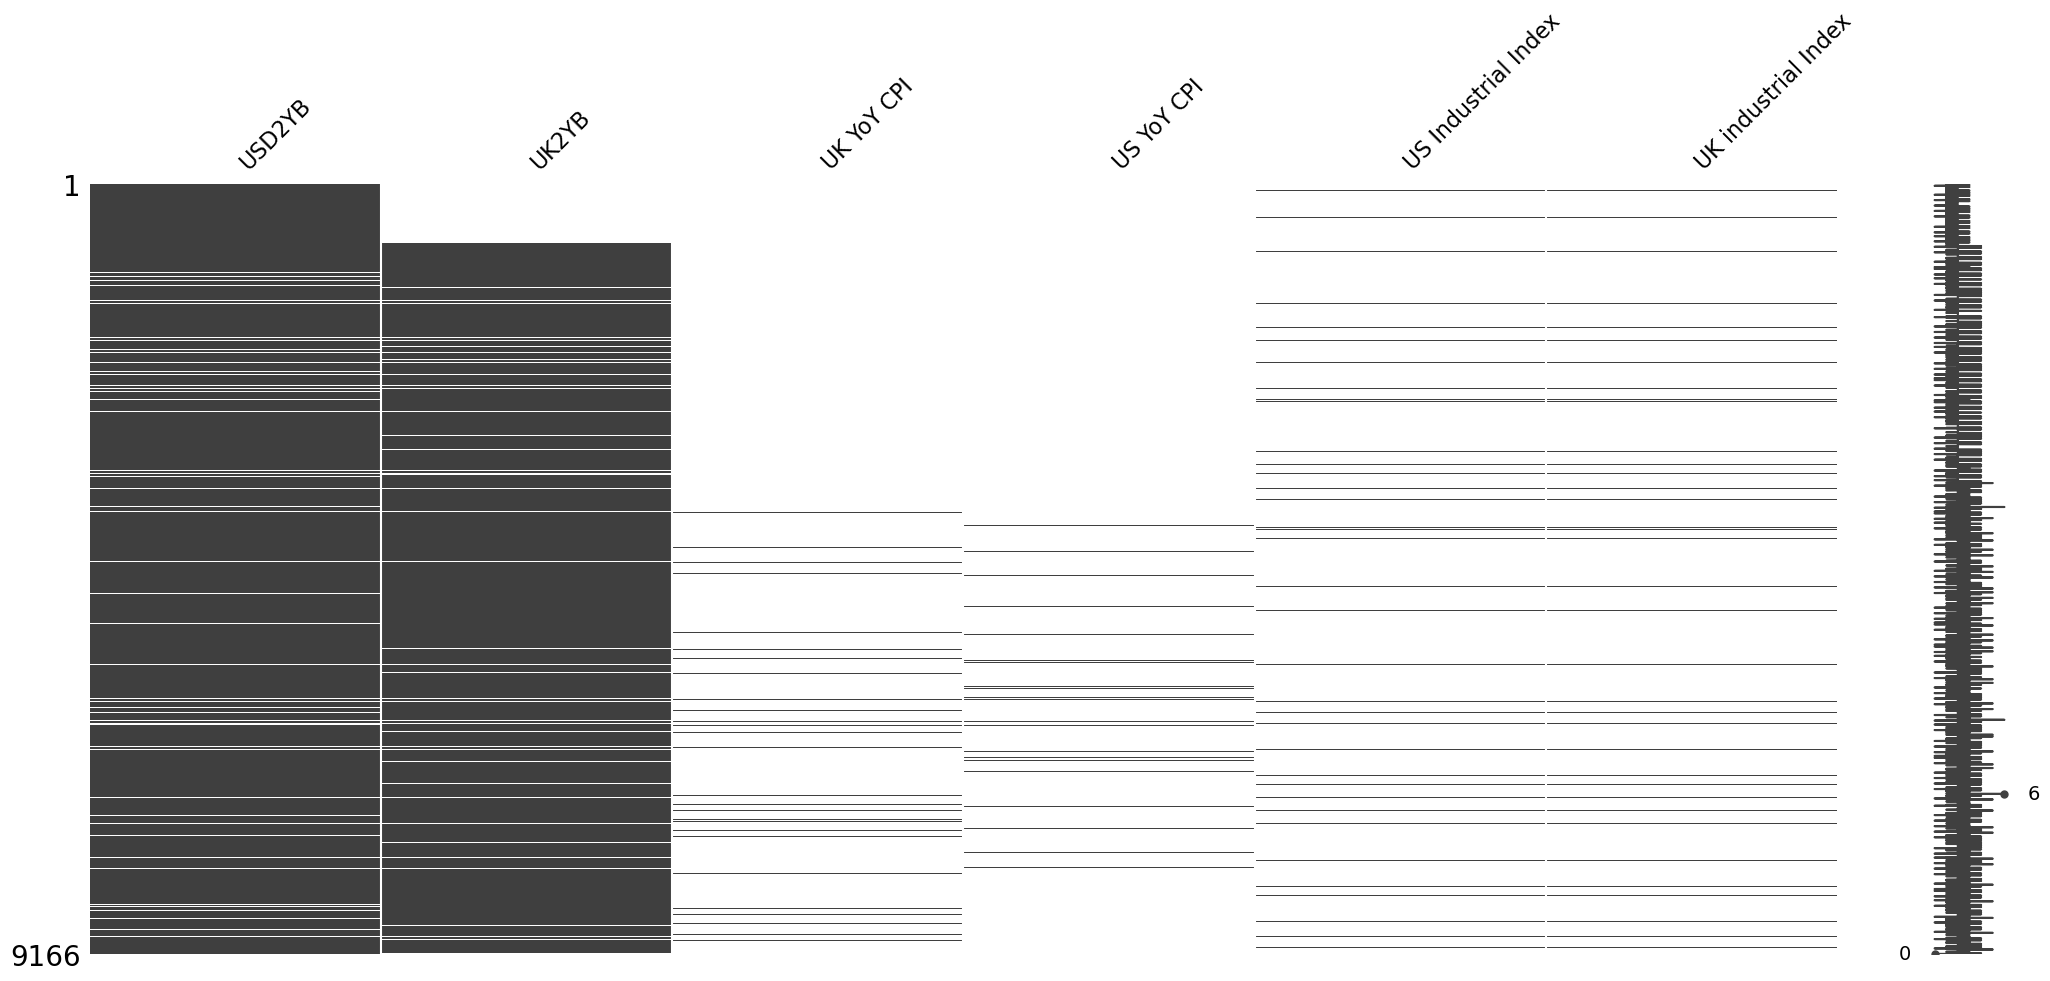

In [ ]:
# im gonna see all the missing values in the data
import missingno as msno # import the missingno library. 
#This library is used to visualize the missing values in the data
msno.matrix(df) # plot the missing values

We have a lot of missing values because the CPI and Industrial Index are released once in a month, at an publish date, that is around two weeks after the last day of the month.

In [4]:
#we find the first value of CPI in order the delet the NaN values that are before that date
initial_date = df['UK YoY CPI'].first_valid_index() 
#.fist_valid_index() returns the first non-NaN value
initial_date

Timestamp('2003-06-17 00:00:00')

In [5]:
#im gonna transform initial_date to first day of the last month 
initial_date = initial_date.replace(day=1) #We replace the day to 1 on the first valid index
#We reduce 1 month to this date
initial_date = initial_date - pd.DateOffset(months=1) #We reduce 1 month to the date
initial_date

Timestamp('2003-05-01 00:00:00')

In [6]:
#Lets transform the date to a string, keeping the format YYYY-DD-MM
initial_date_2 = initial_date.strftime('%Y-%m-%d') #We transform the date to a string
#We do this to use it in the yfinance library in order to download the data
initial_date_2

'2003-05-01'

In [7]:
ticker = "USDGBP=X" #We define the ticker of the exchange rate USD to GBP
usd_to_gbp_rate = yf.download(ticker, start=initial_date_2, end=df.index[-1].strftime('%Y-%m-%d')) 
#We download the data. We set the start date to the initial_date_2 and the end date to the last date of the data

[*********************100%%**********************]  1 of 1 completed


In [8]:
usd_to_gbp_rate.head(4) 


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,0.58011,0.58194,0.57897,0.58187,0.58187,0
2003-12-02,0.58173,0.58231,0.57733,0.57793,0.57793,0
2003-12-03,0.57787,0.57964,0.57743,0.57867,0.57867,0
2003-12-04,0.57890,0.58197,0.57837,0.58116,0.58116,0


The first value available from yahoo finance for the exchange rate is from december 2003, wich is after the first value of our data, june 2003. 

In [9]:
#we are gonna drop all the values before initial_date
df = df[initial_date:] #We drop all the values before the initial_date
df.head()

,USD2YB,UK2YB,UK YoY CPI,US YoY CPI,US Industrial Index,UK industrial Index
Date,,,,,,
2003-05-01,1.469,3.572,NaN,NaN,NaN,NaN
2003-05-02,1.565,3.631,NaN,NaN,NaN,NaN
2003-05-05,1.533,NaN,NaN,NaN,NaN,NaN
2003-05-06,1.428,3.644,NaN,NaN,NaN,NaN
2003-05-07,1.412,3.585,NaN,NaN,NaN,NaN


In [10]:
#Im gonna try transform USD2YB and UK2YB to a daily frequency
df['USD2YB'] = ((df['USD2YB']/100)+1)**(1/126) #We transform the USD2YB to a daily frequency
#We use 126 because we have 252 business days in a year, and this note pays a coupon each 6 months
df['UK2YB'] = ((df['UK2YB']/100)+1)**(1/126)

In [11]:
#Im gonna transform the USD2YB and UK2YB to a log return
df['USD2YB'] = np.log(df['USD2YB'])
df['UK2YB'] = np.log(df['UK2YB'])


In [12]:
nan_values = df.isnull().sum() #We count the NaN values in each column
print("NaN values in each column:")
print(nan_values)



NaN values in each column:
USD2YB                  299
UK2YB                   246
UK YoY CPI             5221
US YoY CPI             5220
US Industrial Index    5219
UK industrial Index    5220
dtype: int64


In [13]:
#Im gonna calculate the log return of the exchange rate
usd_to_gbp_rate = usd_to_gbp_rate.copy()
#We calculate the log return of the exchange rate
usd_to_gbp_rate['log_return'] = np.log(usd_to_gbp_rate['Adj Close']) - np.log(usd_to_gbp_rate['Adj Close'].shift(1))
#were gonna drop the first value of the log return
usd_to_gbp_rate = usd_to_gbp_rate.dropna()
#we keep only the columns Adj Close and log_return
usd_to_gbp_rate = usd_to_gbp_rate[['Adj Close', 'log_return']]

In [14]:
initial_date_3 = usd_to_gbp_rate['Adj Close'].first_valid_index() 
#We find the first valid index of the exchange rate
initial_date_3

Timestamp('2003-12-02 00:00:00')

In [15]:
df = df.merge(usd_to_gbp_rate["log_return"], left_index=True, right_index=True, how='left')
#We merge the log return of the exchange rate to the data

In [16]:
df.head(15) 

,USD2YB,UK2YB,UK YoY CPI,US YoY CPI,US Industrial Index,UK industrial Index,log_return
Date,,,,,,,
2003-05-01,0.000116,0.000279,NaN,NaN,NaN,NaN,NaN
2003-05-02,0.000123,0.000283,NaN,NaN,NaN,NaN,NaN
2003-05-05,0.000121,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-06,0.000113,0.000284,NaN,NaN,NaN,NaN,NaN
2003-05-07,0.000111,0.000280,NaN,NaN,NaN,NaN,NaN
2003-05-08,0.000115,0.000284,NaN,NaN,NaN,NaN,NaN
2003-05-09,0.000114,0.000286,NaN,NaN,NaN,NaN,NaN
2003-05-12,0.000113,0.000284,NaN,NaN,NaN,NaN,NaN
2003-05-13,0.000114,0.000282,NaN,NaN,NaN,NaN,NaN


In [17]:
#Im gonna resample the data to a monthly frequency. For USD2YB and UK2YB we are gonna use the sum of the log returns, and for the rest of the columns we are gonna use the last value of the month.

df2 = df.resample('M').agg({'USD2YB':'sum', 'UK2YB':'sum', 'UK YoY CPI':'last', 'US YoY CPI':'last', 'UK industrial Index':'last', 'US Industrial Index':'last', 'log_return':'sum'})
df2
#The first 6 values of log_return are 0.

,USD2YB,UK2YB,UK YoY CPI,US YoY CPI,UK industrial Index,US Industrial Index,log_return
Date,,,,,,,
2003-05-31,0.002300,0.005518,NaN,2.2,101.1,90.4281,0.000000
2003-06-30,0.002001,0.005601,1.2,2.1,99.8,90.4073,0.000000
2003-07-31,0.002527,0.006387,1.1,2.1,100.4,90.5218,0.000000
2003-08-31,0.003007,0.006292,1.3,2.1,101.0,90.9896,0.000000
2003-09-30,0.002777,0.007110,1.4,2.2,101.2,90.7858,0.000000
...,...,...,...,...,...,...,...
2023-09-30,0.007813,0.008113,6.7,3.7,95.0,103.2411,0.040701
2023-10-31,0.008264,0.008272,6.7,3.7,94.9,103.3346,0.003205
2023-11-30,0.007962,0.007883,4.6,3.2,93.7,102.4592,-0.042694


In [18]:
#We create a column of the difference between USD2YB and UK2YB
df2['Y_diff'] = df2['USD2YB'] - df2['UK2YB']

In [19]:
#Transform USD2YB and UK2YB to simple returns
df2['USD2YB'] = np.exp(df2['USD2YB'])-1
df2['UK2YB'] = np.exp(df2['UK2YB'])-1

In [20]:
# Specify the columns to be shifted
columns_to_shift = ['UK YoY CPI', 'US YoY CPI', 'US Industrial Index', 'UK industrial Index']

# Shift the specified columns using .shift(-1)
df2[columns_to_shift] = df2[columns_to_shift].shift(-1)

# Display the resulting DataFrame with shifted columns
df2

,USD2YB,UK2YB,UK YoY CPI,US YoY CPI,UK industrial Index,US Industrial Index,log_return,Y_diff
Date,,,,,,,,
2003-05-31,0.002302,0.005534,1.2,2.1,99.8,90.4073,0.000000,-0.003219
2003-06-30,0.002003,0.005616,1.1,2.1,100.4,90.5218,0.000000,-0.003600
2003-07-31,0.002530,0.006407,1.3,2.1,101.0,90.9896,0.000000,-0.003860
2003-08-31,0.003011,0.006312,1.4,2.2,101.2,90.7858,0.000000,-0.003285
2003-09-30,0.002781,0.007135,1.4,2.3,101.4,91.3829,0.000000,-0.004333
...,...,...,...,...,...,...,...,...
2023-09-30,0.007844,0.008146,6.7,3.7,94.9,103.3346,0.040701,-0.000300
2023-10-31,0.008298,0.008307,4.6,3.2,93.7,102.4592,0.003205,-0.000009
2023-11-30,0.007994,0.007914,3.9,3.1,93.9,102.4301,-0.042694,0.000079


In [21]:
#we get rid of the last two rows of the dataframes
df2 = df2[:-2]

In [22]:
df2.isnull().sum()

USD2YB                 0
UK2YB                  0
UK YoY CPI             0
US YoY CPI             0
UK industrial Index    0
US Industrial Index    0
log_return             0
Y_diff                 0
dtype: int64

# Data Preparation

In [23]:
df2 = df2.copy()
df2.reset_index(inplace=True)
df2.rename(columns={'UK industrial Index': 'UK_Industrial_Index', 'US Industrial Index': 'US_Industrial_Index',
                    'UK YoY CPI': 'UK_YoY_CPI', 'US YoY CPI': 'US_YoY_CPI'}, inplace=True)
df2

,Date,USD2YB,UK2YB,UK_YoY_CPI,US_YoY_CPI,UK_Industrial_Index,US_Industrial_Index,log_return,Y_diff
0,2003-05-31,0.002302,0.005534,1.2,2.1,99.8,90.4073,0.000000,-0.003219
1,2003-06-30,0.002003,0.005616,1.1,2.1,100.4,90.5218,0.000000,-0.003600
2,2003-07-31,0.002530,0.006407,1.3,2.1,101.0,90.9896,0.000000,-0.003860
3,2003-08-31,0.003011,0.006312,1.4,2.2,101.2,90.7858,0.000000,-0.003285
4,2003-09-30,0.002781,0.007135,1.4,2.3,101.4,91.3829,0.000000,-0.004333
...,...,...,...,...,...,...,...,...,...
242,2023-07-31,0.007547,0.008385,6.8,3.2,95.4,103.1900,-0.018795,-0.000831
243,2023-08-31,0.008801,0.008640,6.7,3.7,95.0,103.2411,0.011122,0.000159
244,2023-09-30,0.007844,0.008146,6.7,3.7,94.9,103.3346,0.040701,-0.000300
245,2023-10-31,0.008298,0.008307,4.6,3.2,93.7,102.4592,0.003205,-0.000009


In [24]:
df2.head(15)

,Date,USD2YB,UK2YB,UK_YoY_CPI,US_YoY_CPI,UK_Industrial_Index,US_Industrial_Index,log_return,Y_diff
0,2003-05-31,0.002302,0.005534,1.2,2.1,99.8,90.4073,0.000000,-0.003219
1,2003-06-30,0.002003,0.005616,1.1,2.1,100.4,90.5218,0.000000,-0.003600
2,2003-07-31,0.002530,0.006407,1.3,2.1,101.0,90.9896,0.000000,-0.003860
3,2003-08-31,0.003011,0.006312,1.4,2.2,101.2,90.7858,0.000000,-0.003285
4,2003-09-30,0.002781,0.007135,1.4,2.3,101.4,91.3829,0.000000,-0.004333
5,2003-10-31,0.002981,0.007899,1.4,2.0,103.2,91.5005,0.000000,-0.004892
6,2003-11-30,0.002685,0.007095,1.3,1.8,101.8,92.1265,0.000000,-0.004388
7,2003-12-31,0.003257,0.007173,1.3,1.9,101.8,92.1722,-0.040151,-0.003896
8,2004-01-31,0.002716,0.007045,1.4,1.9,103.1,92.3270,-0.022203,-0.004307
9,2004-02-29,0.002558,0.006693,1.3,1.7,102.8,92.8873,-0.023940,-0.004116


In [25]:
#As in Papell and Prodan (2006), we are gonna use the following window:
output_windows_2 = 26
exchange_window_2 = 120

In [26]:
#We create a moving average of Y_diff
windows = 6
df2['Y_diff_MA'] = df2['Y_diff'].rolling(window=windows).mean()
#Now we only keep from the output_windowsth value
Y_diff = df2.loc[output_windows_2:len(df2)-2,'Y_diff_MA'].reset_index(drop=True)
Y_diff = Y_diff.rename('Y_diff')

In [27]:
#Lets transfor this code into a function
def preparation_data(df2, output_windows):
    s_change = df2.loc[output_windows:len(df2)-2,'log_return'].reset_index(drop=True) #Why reset index? To combine into a single data set later
    s_change = s_change.rename('s_change')


    ## Independent Variables
    # inf_us, inf_df2 : us inflation at t, df2 inflation at t
    inf_df2 = df2.loc[output_windows:len(df2)-2,'UK_YoY_CPI'].reset_index(drop=True)
    inf_us = df2.loc[output_windows:len(df2)-2,'US_YoY_CPI'].reset_index(drop=True)
    inf_diff = inf_us - inf_df2
    inf_diff = inf_diff.rename('inf_diff')

    # inf_us, inf_df2 : us inflation at t, df2 inflation at t
    yield_df2 = df2.loc[output_windows:len(df2)-2,'UK2YB'].reset_index(drop=True)
    yield_us = df2.loc[output_windows:len(df2)-2,'USD2YB'].reset_index(drop=True)
    yield_diff = yield_us - yield_df2
    yield_diff = yield_diff.rename('yield_diff')



    # output_us, output_df2 : us output at t, df2 output at t
    output_uk = df2.loc[output_windows:len(df2)-2,'UK_Industrial_Index'].reset_index(drop=True)
    output_us = df2.loc[output_windows:len(df2)-2,'US_Industrial_Index'].reset_index(drop=True)


    # date : Time at t+1
    date = df2.loc[output_windows +1:,'Date'].reset_index(drop=True)


    # Combine all variables into a new data set
    df2_const = pd.concat([date,  s_change, inf_diff, output_uk, output_us,yield_diff,Y_diff], axis=1)
    
    return df2_const



In [28]:
df3_const = preparation_data(df2, output_windows_2)

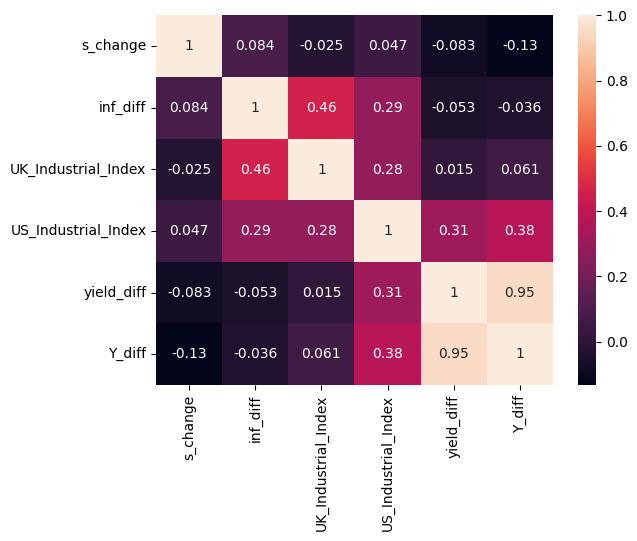

In [29]:
#Correlation matrix plot, droping the date column
import matplotlib.pyplot as plt
import seaborn as sns
corr = df3_const.drop('Date', axis=1).corr()
sns.heatmap(corr, annot=True)
plt.show()

# Strategy

In [30]:
def estimate_output_gap(df2_const, df2, output_windows):
    df2_const = df2_const.copy()
    df2 = df2.copy()
    df2_const.rename(columns={'UK industrial Index': 'UK_Industrial_Index', 'US Industrial Index': 'US_Industrial_Index'}, inplace=True)

    df2['t'] = pd.DataFrame({'t' : range(1,len(df2)+1)})

    for i in range(0,len(df2_const)): # Updating the potential output each period
        
        # note that we are expanding the traning set each loop, starting from 0:output_windows
        linear_trend_df2 = smf.ols(formula = 'UK_Industrial_Index ~ t', data=df2[0:output_windows + 1 +i]).fit()
        
        # we make a prediction for the next period
        df2_const.loc[i,'df2_potential'] = linear_trend_df2.predict(df2['t'][output_windows + 1+i:output_windows + 2+i])[output_windows + 1+i]
        
        # Repeat for the US
        linear_trend_us = smf.ols(formula = 'US_Industrial_Index ~ t', data=df2[0:output_windows + 1+i]).fit()
        df2_const.loc[i,'us_potential'] = linear_trend_us.predict(df2['t'][output_windows + 1+i:output_windows + 2+i])[output_windows + 1+i]
        
    df2_const['df2_gap'] = (df2_const['UK_Industrial_Index'] - df2_const['df2_potential'])/df2_const['df2_potential']
    df2_const['us_gap'] = (df2_const['US_Industrial_Index'] - df2_const['us_potential'])/df2_const['us_potential']


    # Output Gap differential between US and df2
    df2_const['gap_diff'] = df2_const['us_gap'] - df2_const['df2_gap']


    # Keep variables only used for our model
    df2_const=df2_const[['Date', 's_change', 'inf_diff', 'gap_diff', 'yield_diff','Y_diff']]
    ## Make sure all columns have float numbers
    df2_const.loc[:,'yield_diff'] = df2_const.loc[:,'yield_diff'].apply(float)
    df2_const.loc[:,'Y_diff'] = df2_const.loc[:,'Y_diff'].apply(float)
    df2_const.loc[:,'s_change'] = df2_const.loc[:,'s_change'].apply(float)
    df2_const.loc[:,'inf_diff'] = df2_const.loc[:,'inf_diff'].apply(float)
    df2_const.loc[:,'gap_diff'] = df2_const.loc[:,'gap_diff'].apply(float)

    return df2_const

### (b) Run regressions to generate the forecasts of exchange rates based on the Taylor rule

In [31]:
def forecast_exchange_rate(df2_const, exchange_window): 
    # Create empty columns for fitted values of changes i.e. changes of log exchange rates
    df2_const['s_change_fitted'] = np.nan

    # Out-of-sample Forecasts with rolling window : Here, we use the first 120 observations
    for i in range(exchange_window,len(df2_const)):
        #We nowcast inf_diff using yield_diff (interest rate differential) and Y_diff (moving average of yield differential)
        tmp2 = smf.ols(formula = 'inf_diff ~ yield_diff', data=df2_const[i-exchange_window:i-1]).fit()
        df4 = df2_const.copy()
        df4.loc[i-1,'inf_diff'] = tmp2.predict(df2_const[['yield_diff']][i-1:i])[i-1]
        tmp3 = smf.ols(formula = 'gap_diff ~ yield_diff', data=df2_const[i-exchange_window:i-1]).fit()
        df4.loc[i-1,'gap_diff'] = tmp3.predict(df2_const[['yield_diff']][i-1:i])[i-1]
        #I will use MA model for forecasting inf_diff

        # we regress the change in teh exchange rate on the taylor rule fundamentals
        tmp = smf.ols(formula = 's_change ~ inf_diff + gap_diff', data=df4[i-exchange_window:i]).fit()
        
        # make a prediction for the next period
        df2_const.loc[i,'s_change_fitted'] = tmp.predict(df4[['inf_diff', 'gap_diff']][i:i+1])[i]

    # # Forecasts
    # df2_const['s_forecast'] = df2_const['s_change_fitted'] + df2_const['s_current']

    # Forecast Error
    df2_const['error'] = df2_const['s_change']-df2_const['s_change_fitted']
    
    return df2_const


In [32]:
def model_exchange_1(df2,output_window, exchange_window):
    df2_const_1 = preparation_data(df2, output_window)
    df2_const_2 = estimate_output_gap(df2_const_1, df2, output_window)
    df2_const_3 = forecast_exchange_rate(df2_const_2, exchange_window)
    df3 = df2_const_3.dropna()
    df3 = df3.copy()

    # Go long if we forecast the exchange rate will increase, otherwise short
    df3['signal'] = np.where(df3['s_change_fitted'] >= 0, 1, -1)

    # calculate returns
    df3['returns'] = np.exp(df3['signal']*df3['s_change'])
    df3['strategy_return'] = (np.exp((df3['signal']*df3['s_change']).cumsum())-1)*100

    return df3

In [34]:
df2_const = model_exchange_1(df2, output_windows_2, exchange_window_2)

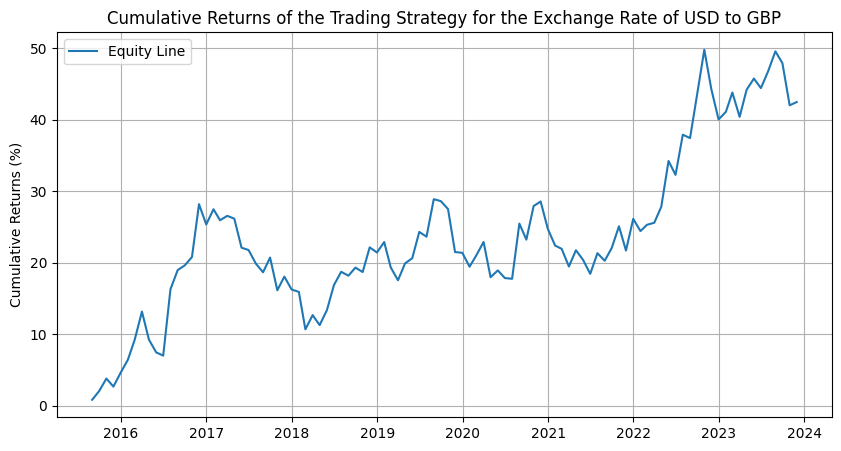

In [35]:
import matplotlib.pyplot as plt
df3 = df2_const.copy()
df3.index = pd.to_datetime(df3.Date)
plt.figure(figsize = (10, 5))
plt.plot(df3['strategy_return'])
plt.ylabel("Cumulative Returns (%)")
#Check the title!!
plt.title("Cumulative Returns of the Trading Strategy for the Exchange Rate of USD to GBP")

plt.legend(["Equity Line"])
plt.grid()

### Annualized Return

In [36]:
#Im gonna get the annualized return
annualized_return = (np.power(((df3['strategy_return'].iloc[-1]/100)+1), 12/len(df3))-1)*100
annualized_return

4.33934006997827

In [37]:
#what would have been the return of a random walk
df5 = df2_const.copy()
df5['s_change_fitted'] = df5['s_change'].shift(1)
df5 = df5.dropna()
df5['signal'] = np.where(df5['s_change_fitted'] >= 0, 1, -1)
# calculate returns
df5['returns'] = np.exp(df5['signal']*df5['s_change'])
df5['strategy_return'] = (np.exp((df5['signal']*df5['s_change']).cumsum())-1)*100
annualized_return_2 = (np.power(((df5['strategy_return'].iloc[-1]/100)+1), 12/len(df5))-1)*100
annualized_return_2


-1.1415748198895015

### Sharpe ratio

In [38]:
ereturns2 = df3['strategy_return'].iloc[-1]

In [39]:
sharpe_ratio = (np.exp(np.log(df3['returns']+1).mean())-1)/(np.exp(np.log(df3['returns']+1).std()))
sharpe_ratio


0.9913105969704133

# We optimize the Hyperparameters

In [40]:
output_windows_1 = np.arange(10, 28, 2) 
exchange_window_1 = np.arange(12, 120, 6)
 
u1, l1 = np.meshgrid(output_windows_1, exchange_window_1)
u1 = u1.flatten() #flatten is used to convert the matrix into a vector
l1 = l1.flatten()
#We create a dataframe with the combinations
df_combinations = pd.DataFrame({'u1': u1, 'l1': l1})


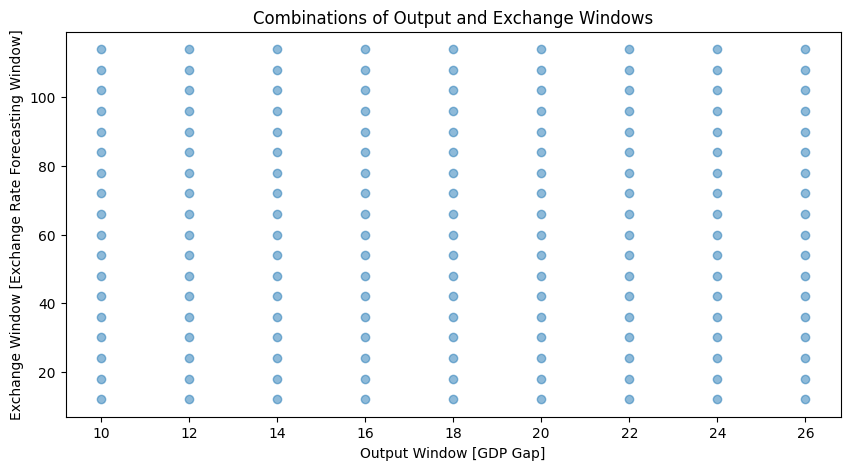

In [41]:

#plot the combinations
plt.figure(figsize=(10,5))
plt.scatter(df_combinations['u1'], df_combinations['l1'], alpha=0.5)
plt.xlabel('Output Window [GDP Gap]')
plt.ylabel('Exchange Window [Exchange Rate Forecasting Window]')
plt.title('Combinations of Output and Exchange Windows')
plt.show()


In [42]:
def model_exchange(df2,output_window, exchange_window): #output_window for calculating output gap, exchange_window for forecasting exchange rate
    df2_const_1 = preparation_data(df2, output_window) 
    df2_const_2 = estimate_output_gap(df2_const_1, df2, output_window) #estimate output gap
    df2_const_3 = forecast_exchange_rate(df2_const_2, exchange_window) #forecast exchange rate
    #df3 = df2_const.dropna()
    df3 = df2_const_3.dropna()
    df3 = df3.copy()

    # Go long if we forecast the exchange rate will increase, otherwise short
    df3['signal'] = np.where(df3['s_change_fitted'] >= 0, 1, -1)

    # calculate returns
    df3['returns'] = np.exp(df3['signal']*df3['s_change'])
    df3['strategy_return'] = (np.exp((df3['signal']*df3['s_change']).cumsum())-1)*100

    sharpe_ratio = (np.exp(np.log(df3['returns']+1).mean())-1)/(np.exp(np.log(df3['returns']+1).std()))
    
    annualized_return = (np.power(((df3['strategy_return'].iloc[-1]/100)+1), 12/len(df3))-1)*100
    
    geom_return = ((df3['returns'].prod())**(1/len(df3)))-1

    return sharpe_ratio, annualized_return, geom_return

In [43]:

#transform df_combinations
df_combinations = df_combinations.values
results = {'GDP window': [], 'Forecast Window': [], 'Geom_Return': [], 'Sharpe': []}

#We are going to iterate over the combinations of u1 and l1
for u1, l1 in df_combinations:
    for i in range(2):
        results['GDP window'].append(u1)
        results['Forecast Window'].append(l1)
        try:
            sharpe_ratio_1, _, geom_return = model_exchange(df2, u1, l1)
            results['Geom_Return'].append(geom_return)
            results['Sharpe'].append(sharpe_ratio_1)
        except KeyError:
            print('There is an error in the combination: ', u1, l1)
            continue
# Convert results to a DataFrame for easier handling
results_df = pd.DataFrame(results)
#we are going to convert the list of dictionaries into a DataFrame
sorted_results = results_df.sort_values(by='Geom_Return', ascending=False)
#we are going to sort the DataFrame by the Sharpe ratio in descending order
sorted_results = sorted_results.dropna()

In [ ]:
max_GM_h_index = sorted_results['Geom_Return'].idxmax()

# Extract the corresponding hyperparameters and GM values
best_hyperparameters_h = sorted_results.loc[max_GM_h_index, ['GDP window', 'Forecast Window', 'Geom_Return']]

display("Best Hyperparameters: ", best_hyperparameters_h)


In [ ]:
#Heatmap 
import seaborn as sns
#This function is going to plot the heatmap
def heatmap(x, y, metric, values, title = 'Heatmap'):
    #S is the window size
    # specify the columns I will be pulling from the results
    p2p = values[[x, y, metric]]
    #subsetting the DataFrame
    # If p > 2, we need to group 
    heat = np.round(p2p.groupby([x,y]).mean(),5)
    #grouping the DataFrame by the x and y columns and calculating the mean of the metric
    heat = heat.unstack()[metric] #transform the DataFrame into a matrix
    #This will create a matrix, with the x values as the index and the y values as the columns.
    #the values within the matrix are the metric

    # round labels
    heat.index = np.round(heat.index,2) #we are going to round the index
    #We are rounding the x that has become the index after the unstack
    heat.columns = np.round(heat.columns,2) #we are going to round the columns

    # make plot
    f, ax = plt.subplots(figsize=(11.5, 5))
    ax = sns.heatmap(heat, fmt='.1g') #plot this matrix as a heatmap
    ax.set_title(title,size = 18)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xlabel(y, size = 18)
    ax.set_ylabel(x, size = 18)
    ax.collections[0].colorbar.set_label(metric, size = 18)
    sns.set(font_scale=1)
    #Lets delimit the heatmap colors to be between the minimum and maximum values of the metric
    plt.show()

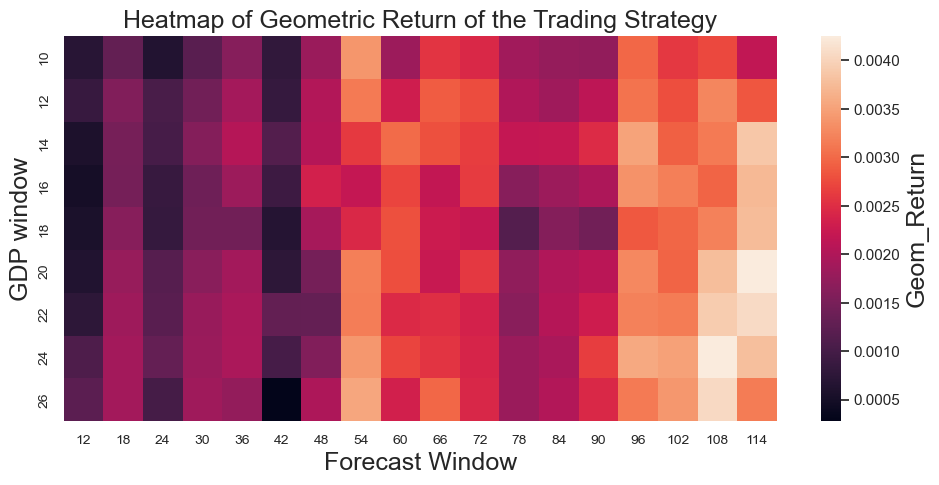

In [ ]:
temp = sorted_results
heatmap("GDP window", "Forecast Window","Geom_Return", temp, title = 'Heatmap of Geometric Return of the Trading Strategy')

In [ ]:
#Lets obtain the values of output_window and exchange_window that maximize the sharpe ratio and the annualized return
sharpe_ratio = 0
annualized_return = 0
output_window_s = 0
exchange_window_s = 0
sharpe_ratio_3 = 0
annualized_return_3 = 0
output_window_a = 0
exchange_window_a = 0
#Lets do sequentials of 10
for i in np.arange(10, 30, 2):#We are gonna use a step of 2
    for j in np.arange(12, 120, 6):#We are gonna use a step of 6
        try:
            sharpe_ratio_2, annualized_return_2 = model_exchange(df2, i, j)
            if sharpe_ratio_2 > sharpe_ratio:
                sharpe_ratio = sharpe_ratio_2
                annualized_return_3 = annualized_return_2
                output_window_s = i
                exchange_window_s = j
            if annualized_return_2 > annualized_return:
                annualized_return = annualized_return_2
                sharpe_ratio_3 = sharpe_ratio_2
                output_window_a = i
                exchange_window_a = j
        except KeyError:
            continue


ValueError: too many values to unpack (expected 2)

In [ ]:
print("The values of output_window and exchange_window that maximize the sharpe ratio are: ", output_window_s, " and ", exchange_window_s)
print("The values of output_window and exchange_window that maximize the annualized return are: ", output_window_a, " and ", exchange_window_a)
print("The maximum sharpe ratio is: ", np.round(sharpe_ratio,3))
print("The maximum annualized return is: ", np.round(annualized_return,3))

The values of output_window and exchange_window that maximize the sharpe ratio are:  24  and  108
The values of output_window and exchange_window that maximize the annualized return are:  24  and  108
The maximum sharpe ratio is:  0.9922115165442555
The maximum annualized return is:  5.226996201757506


We use the optimal windows

In [ ]:
#As in Papell and Prodan (2006), we are gonna use the following window:
output_windows = 24
exchange_window = 108

In [ ]:
df2_const = model_exchange_1(df2, output_windows, exchange_window)

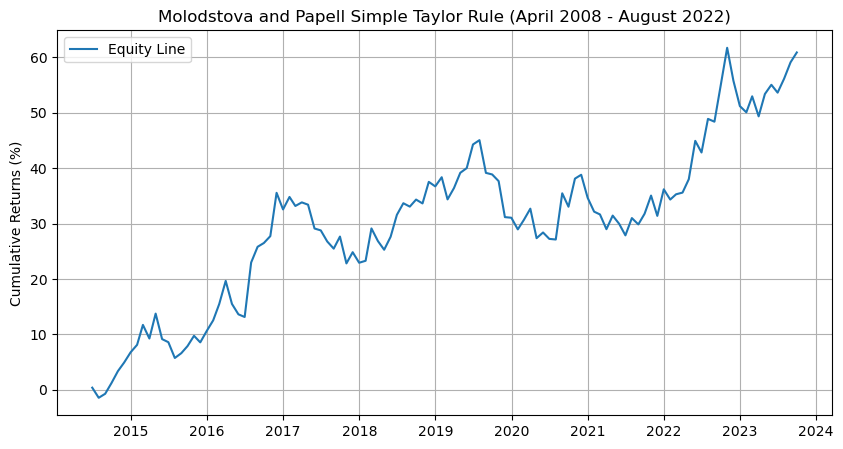

In [ ]:
import matplotlib.pyplot as plt
df3c = df2_const
df3c.index = pd.to_datetime(df3c.Date)
plt.figure(figsize = (10, 5))
plt.plot(df3c['strategy_return'])
plt.ylabel("Cumulative Returns (%)")
#Check the title!!
plt.title("Molodstova and Papell Simple Taylor Rule (April 2008 - August 2022)")

plt.legend(["Equity Line"])
plt.grid()

In [ ]:
#Im gonna get the annualized return
annualized_return = (np.power(((df3c['strategy_return'].iloc[-1]/100)+1), 12/len(df3c))-1)*100
annualized_return

5.226996201757506

In [ ]:
sharpe_ratio = (np.exp(np.log(df3c['returns']+1).mean())-1)/(np.exp(np.log(df3c['returns']+1).std()))
sharpe_ratio

0.9922115165442555